In [409]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [410]:
# Compulsory checking of the head data in the data set :)

car_df = pd.read_csv('automobile.txt', encoding = "ISO-8859-1")
car_df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


The given data set describes the specifications of different cars based on 'symbolling', 'normalized losses', 'make', 'fuel type', 'aspiration', number of doors', to name a few. This data are divided into 26 columns and 206 rows.

In [411]:
# Checking what type of information i am dealing with based on the columns
car_df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [412]:
# Had a lot of trouble with this one but this changed all the ? to the Not available or Nan values so i could find
# all the missing keys in the data... I hope i am not missing any other data.
car_df = car_df.replace('?', np.nan)
list_of_null  = car_df.isnull().sum()
list_of_null 

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [413]:
# The perccentage of null values in the rows.
# This helps me figure out how to deal with missing data, for percentages greater than 50% i feel the data is kind of
# useless. 
data_loss = []
for i in range(len(list_of_null)):
    if list_of_null[i] > 0:
        print( car_df.columns[i] + ' ' + str(round((list_of_null[i] / len(car_df.index)) * 100,2)) + '%')
        data_loss.append(round((list_of_null[i] / len(car_df.index)) * 100,2))
    
data_loss

normalized-losses 20.0%
num-of-doors 0.98%
bore 1.95%
stroke 1.95%
horsepower 0.98%
peak-rpm 0.98%
price 1.95%


[20.0, 0.98, 1.95, 1.95, 0.98, 0.98, 1.95]

As we can see the data shows some small data loss with and average data loss of 4.11% data loss. With the max data loss being on the normalized losses column. I don't particularly know what that column is but I am going to work on figuring it out or cutting it completely. :)

For every loss percentage value less than 10% i will use mean value immputance to fill in the not availabe values. The reason this is done is becuase the low amount of data that is missing won't affect the distribution of the data as much as it would if there was more data missing. After learning better imputance strategies i will use those to better deal will data loss.

In [414]:
# This long python one liner literally simply adds the mean into the not available values 
# but only for the columns that have a less than 10% data loss.
# Excluded normalized losses and number of doors because they need some special attention
# normalized losses has 20% data loss 
# Are all string values
for i in range(len(list_of_null)):
    if list_of_null[i] > 0 and car_df.columns[i] != 'normalized-losses' and car_df.columns[i] != 'num-of-doors':
        car_df[car_df.columns[i]] = car_df[car_df.columns[i]].fillna(car_df[car_df.columns[i]].loc[car_df[car_df.columns[i]].isnull() == False].astype(float).mean())
        car_df[car_df.columns[i]] = car_df[car_df.columns[i]].astype(float)

# Compulsory data checkup
car_df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [415]:
# I often check to see where I am in my data analysis i don't know if this makes it unneat.
list_of_null  = car_df.isnull().sum()
list_of_null 

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  0
stroke                0
compression-ratio     0
horsepower            0
peak-rpm              0
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [416]:
car_df.loc[car_df['num-of-doors'].isnull()]
# Because there are 2 values that are missing in the data set I tried to google the cars and find the missing car 
# door values but I soon realized that that is near impossible to find so... they will be removed from the data set.
# This kind of kills 2 birds with one stone because one of the values has a missing normalized losses value anyway.


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
63,0,NaN,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0


In [417]:
car_df = car_df.dropna(subset=['num-of-doors'])
list_of_null  = car_df.isnull().sum()
list_of_null

symboling             0
normalized-losses    40
make                  0
fuel-type             0
aspiration            0
num-of-doors          0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  0
stroke                0
compression-ratio     0
horsepower            0
peak-rpm              0
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

“Normalized-losses” is described as the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door, small, station wagons, sports/specialty, etc…), and represents the average loss per car per year. This column also has 20% data loss which is bad and makes it really difficult to delete rows of the column because that's 20% of our data. It seems relatively important so I will be dropping the column for our normal data but will create a new data set with the 20% data gone and do some analysis on it to see some things. I think the column will really show some interesting information. 

In [418]:
# Our normal data but without the 20% of data tha covers the empty normalized losses rows.
car_norm_df = car_df.dropna()
# Dropping the normalized losses column
car_df = car_df.drop(columns='normalized-losses')

In [419]:
# Checking the amount of null values in the data frame.
car_norm_df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [420]:
car_df.isnull().sum()

symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Now that our data is clean and has no missing or wrong values, it is clear skies to do some cool analysis on this data and see some cool new things about the data that we have not seen before. 

In [421]:
# This function is best for the basic statistics summary. It creates a really cool stats dataframe.
# This is the coolest part of the whole pandas framework.
basic_stats_df = car_df.describe()
basic_stats_df

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,203.000000,203.000000,203.00000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,0.837438,98.781281,174.11330,65.915271,53.731527,2557.916256,127.073892,3.330931,3.254097,10.093202,104.465578,5125.865709,25.172414,30.699507,13241.913879
std,1.250021,6.040994,12.33909,2.150274,2.442526,522.557049,41.797123,0.271327,0.314858,3.888216,39.612362,477.438883,6.529812,6.874645,7898.957913
min,-2.000000,86.600000,141.10000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.55000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7781.500000
50%,1.000000,97.000000,173.20000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,102.400000,183.30000,66.900000,55.500000,2943.500000,143.000000,3.585000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.10000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


This is some descriptive information about the data we have. I love it so much.

<AxesSubplot:xlabel='count', ylabel='make'>

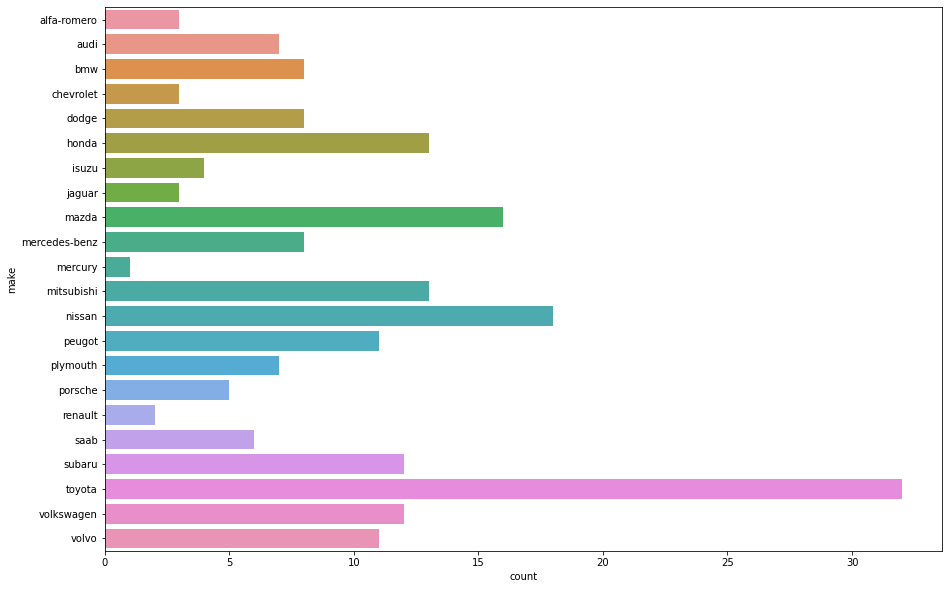

In [422]:
# A count plot is the prettier version of  a histogram in that it counts the frequency of a value. 
fig = plt.figure(figsize=(15,10))
sns.countplot(data = car_df, y = 'make')

Here we look at the make of vehicles in the dataset we have been give to understand the distribution of cars in the given data set.

<AxesSubplot:xlabel='count', ylabel='num-of-doors'>

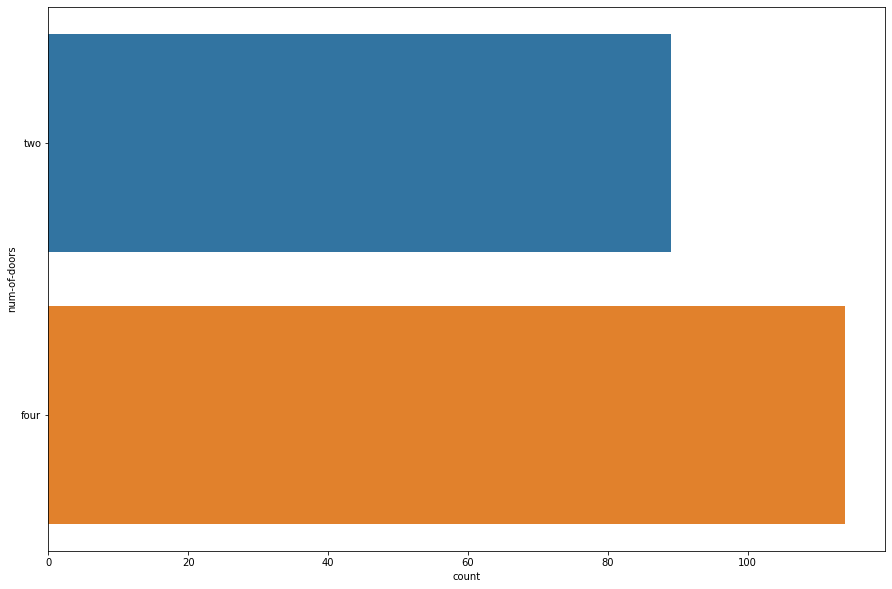

In [423]:
# Count plot for number of doors
fig = plt.figure(figsize=(15,10))
sns.countplot(data = car_df, y = 'num-of-doors')

It is honestly quite interesting to see the distribution of doors in our dataset.

<AxesSubplot:xlabel='count', ylabel='body-style'>

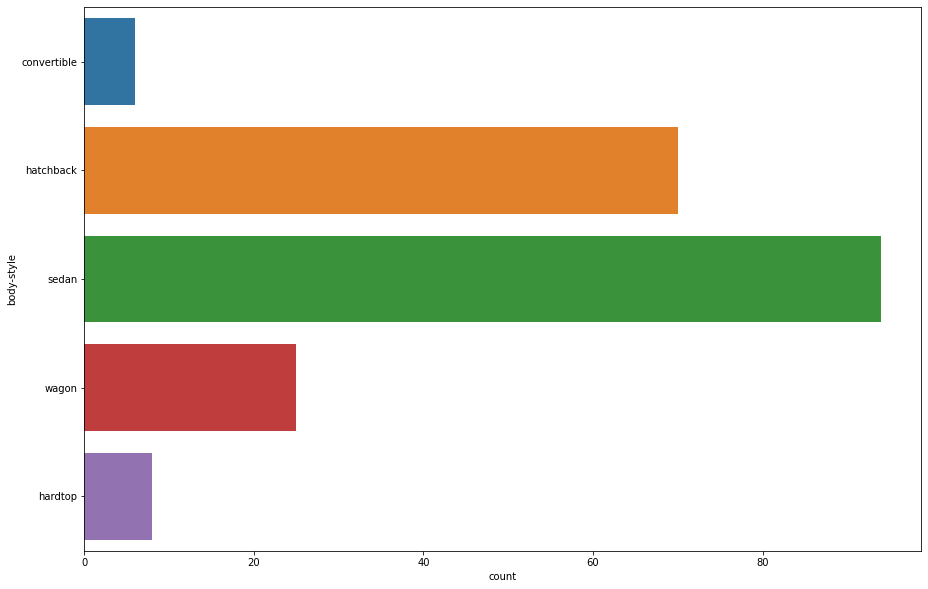

In [424]:
# Count plot for body style
fig = plt.figure(figsize=(15,10))
sns.countplot(data = car_df, y = 'body-style')

([<matplotlib.patches.Wedge at 0x1230fae20>,
 [Text(-0.051051848890061355, -1.0988146835226158, 'Front'),
  Text(0.060333965238824415, 1.2985991732010924, 'Rear')],
 [Text(-0.027846463030942552, -0.5993534637396086, '98.5%'),
  Text(0.03712859399312272, 0.7991379527391337, '1.5%')])

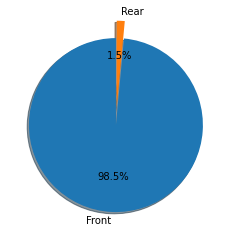

In [425]:
# pie Chart for body style
labels = 'Front', 'Rear'
explode = (0, 0.2)  # only "explode" the 2nd slice 
fig1, ax1 = plt.subplots()
ax1.pie(car_df['engine-location'].value_counts() , labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)

The amount of cars with a front side engine to cars with a rear side engine is apalling I wonder how these things affect the prices of the cars.

<AxesSubplot:xlabel='count', ylabel='fuel-type'>

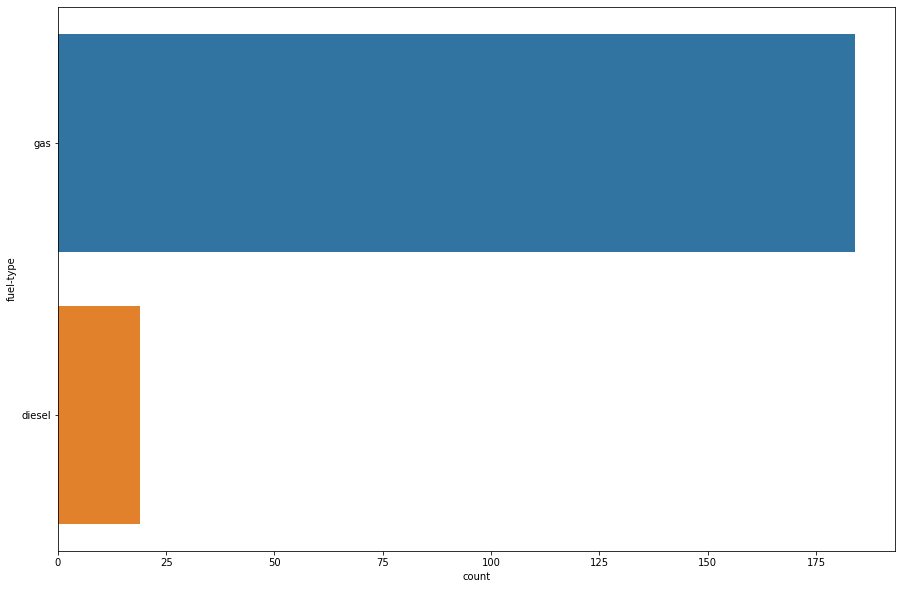

In [426]:
# Count plot for fuel_type style
fig = plt.figure(figsize=(15,10))
sns.countplot(data = car_df, y = 'fuel-type')

<AxesSubplot:xlabel='count', ylabel='drive-wheels'>

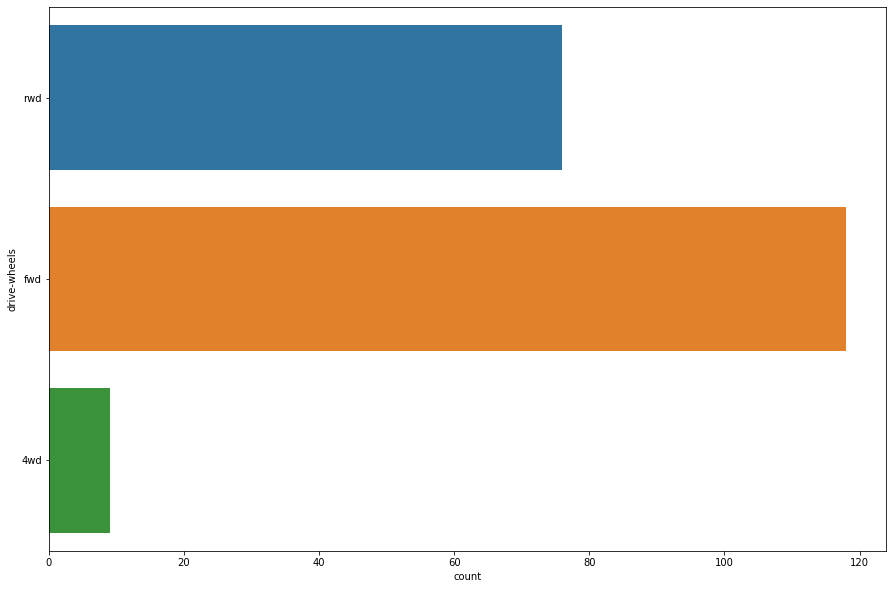

In [427]:
# Count plot for drive-wheels style
fig = plt.figure(figsize=(15,10))
sns.countplot(data = car_df, y = 'drive-wheels')

<AxesSubplot:xlabel='count', ylabel='fuel-system'>

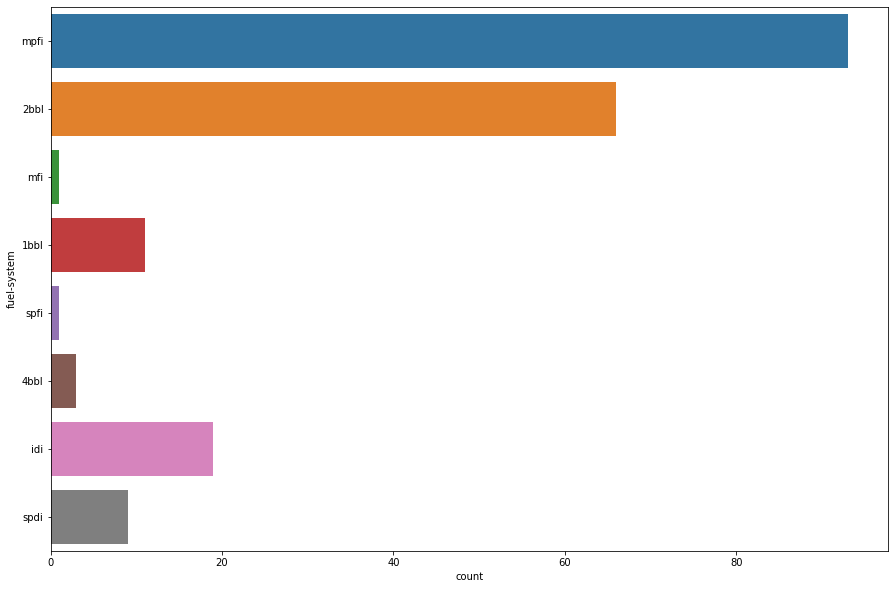

In [428]:
# Count plot for fuel-system style
fig = plt.figure(figsize=(15,10))
sns.countplot(data = car_df, y = 'fuel-system')

In [429]:
# Grouping by the different aspects of the previous counting to see how the affect prices.
group_by_make = car_df.groupby('make')
group_by_engine_location = car_df.groupby('engine-location')
group_by_body_style = car_df.groupby('body-style')
group_by_numofdoors = car_df.groupby('num-of-doors')

# This is some preliminary data to see what it looks like.
group_by_make.sum()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
make,,,,,,,,,,,,,,,
alfa-romero,7,271.7,508.8,193.7,150.0,7919,412,9.620000,8.830000,27.00,376.000000,15000.000000,61,80,46495.000000
audi,9,715.9,1286.8,481.0,381.0,19605,915,22.210000,23.800000,58.80,847.000000,38500.000000,132,169,120362.129353
bmw,3,825.3,1476.0,531.8,438.6,23435,1335,27.790000,25.340000,68.60,1111.000000,40550.000000,155,203,208950.000000
chevrolet,3,277.4,455.8,187.5,157.2,5271,241,8.970000,9.250000,28.70,188.000000,15900.000000,123,139,18021.000000
dodge,8,761.4,1291.6,513.7,414.2,17171,826,24.820000,26.900000,70.11,675.000000,43000.000000,228,277,62321.000000
honda,8,1226.3,2090.0,837.0,692.1,27258,1291,39.280000,45.010000,119.80,1043.000000,74800.000000,395,461,106401.000000
isuzu,3,379.3,655.1,254.2,208.9,8854,410,12.800000,12.680000,36.90,308.000000,20600.000000,124,144,44247.258706
jaguar,0,328.0,590.9,209.8,153.4,12082,842,10.800000,11.100000,27.70,614.000000,14500.000000,43,55,103800.000000
mazda,19,1550.5,2725.9,1048.5,851.6,36620,1629,52.659005,52.521692,155.60,1390.000000,82200.000000,401,501,170304.000000


<AxesSubplot:xlabel='engine-size', ylabel='price'>

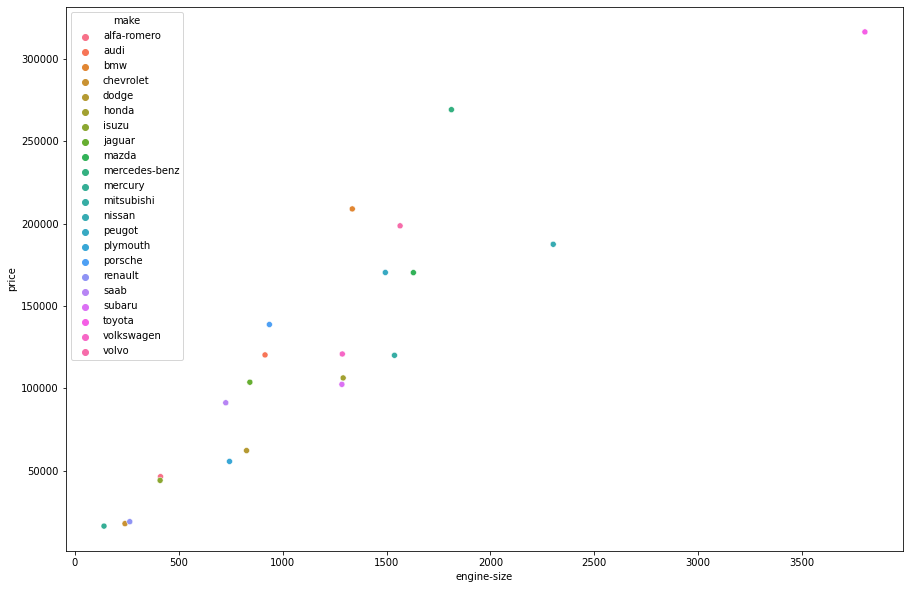

In [430]:
# Scatterplot that describes the relationship between price and engine size for different car makes.
fig = plt.figure(figsize=(15,10))
sns.scatterplot(data = group_by_make.sum(), y = 'price', x = 'engine-size', hue = 'make')

This is a really great representations of the distribution of of the sum of the prices of each car make to the engine sizes of the cars. It is really linear and shows a normal the bigger the engine size the bigger the price of the car.

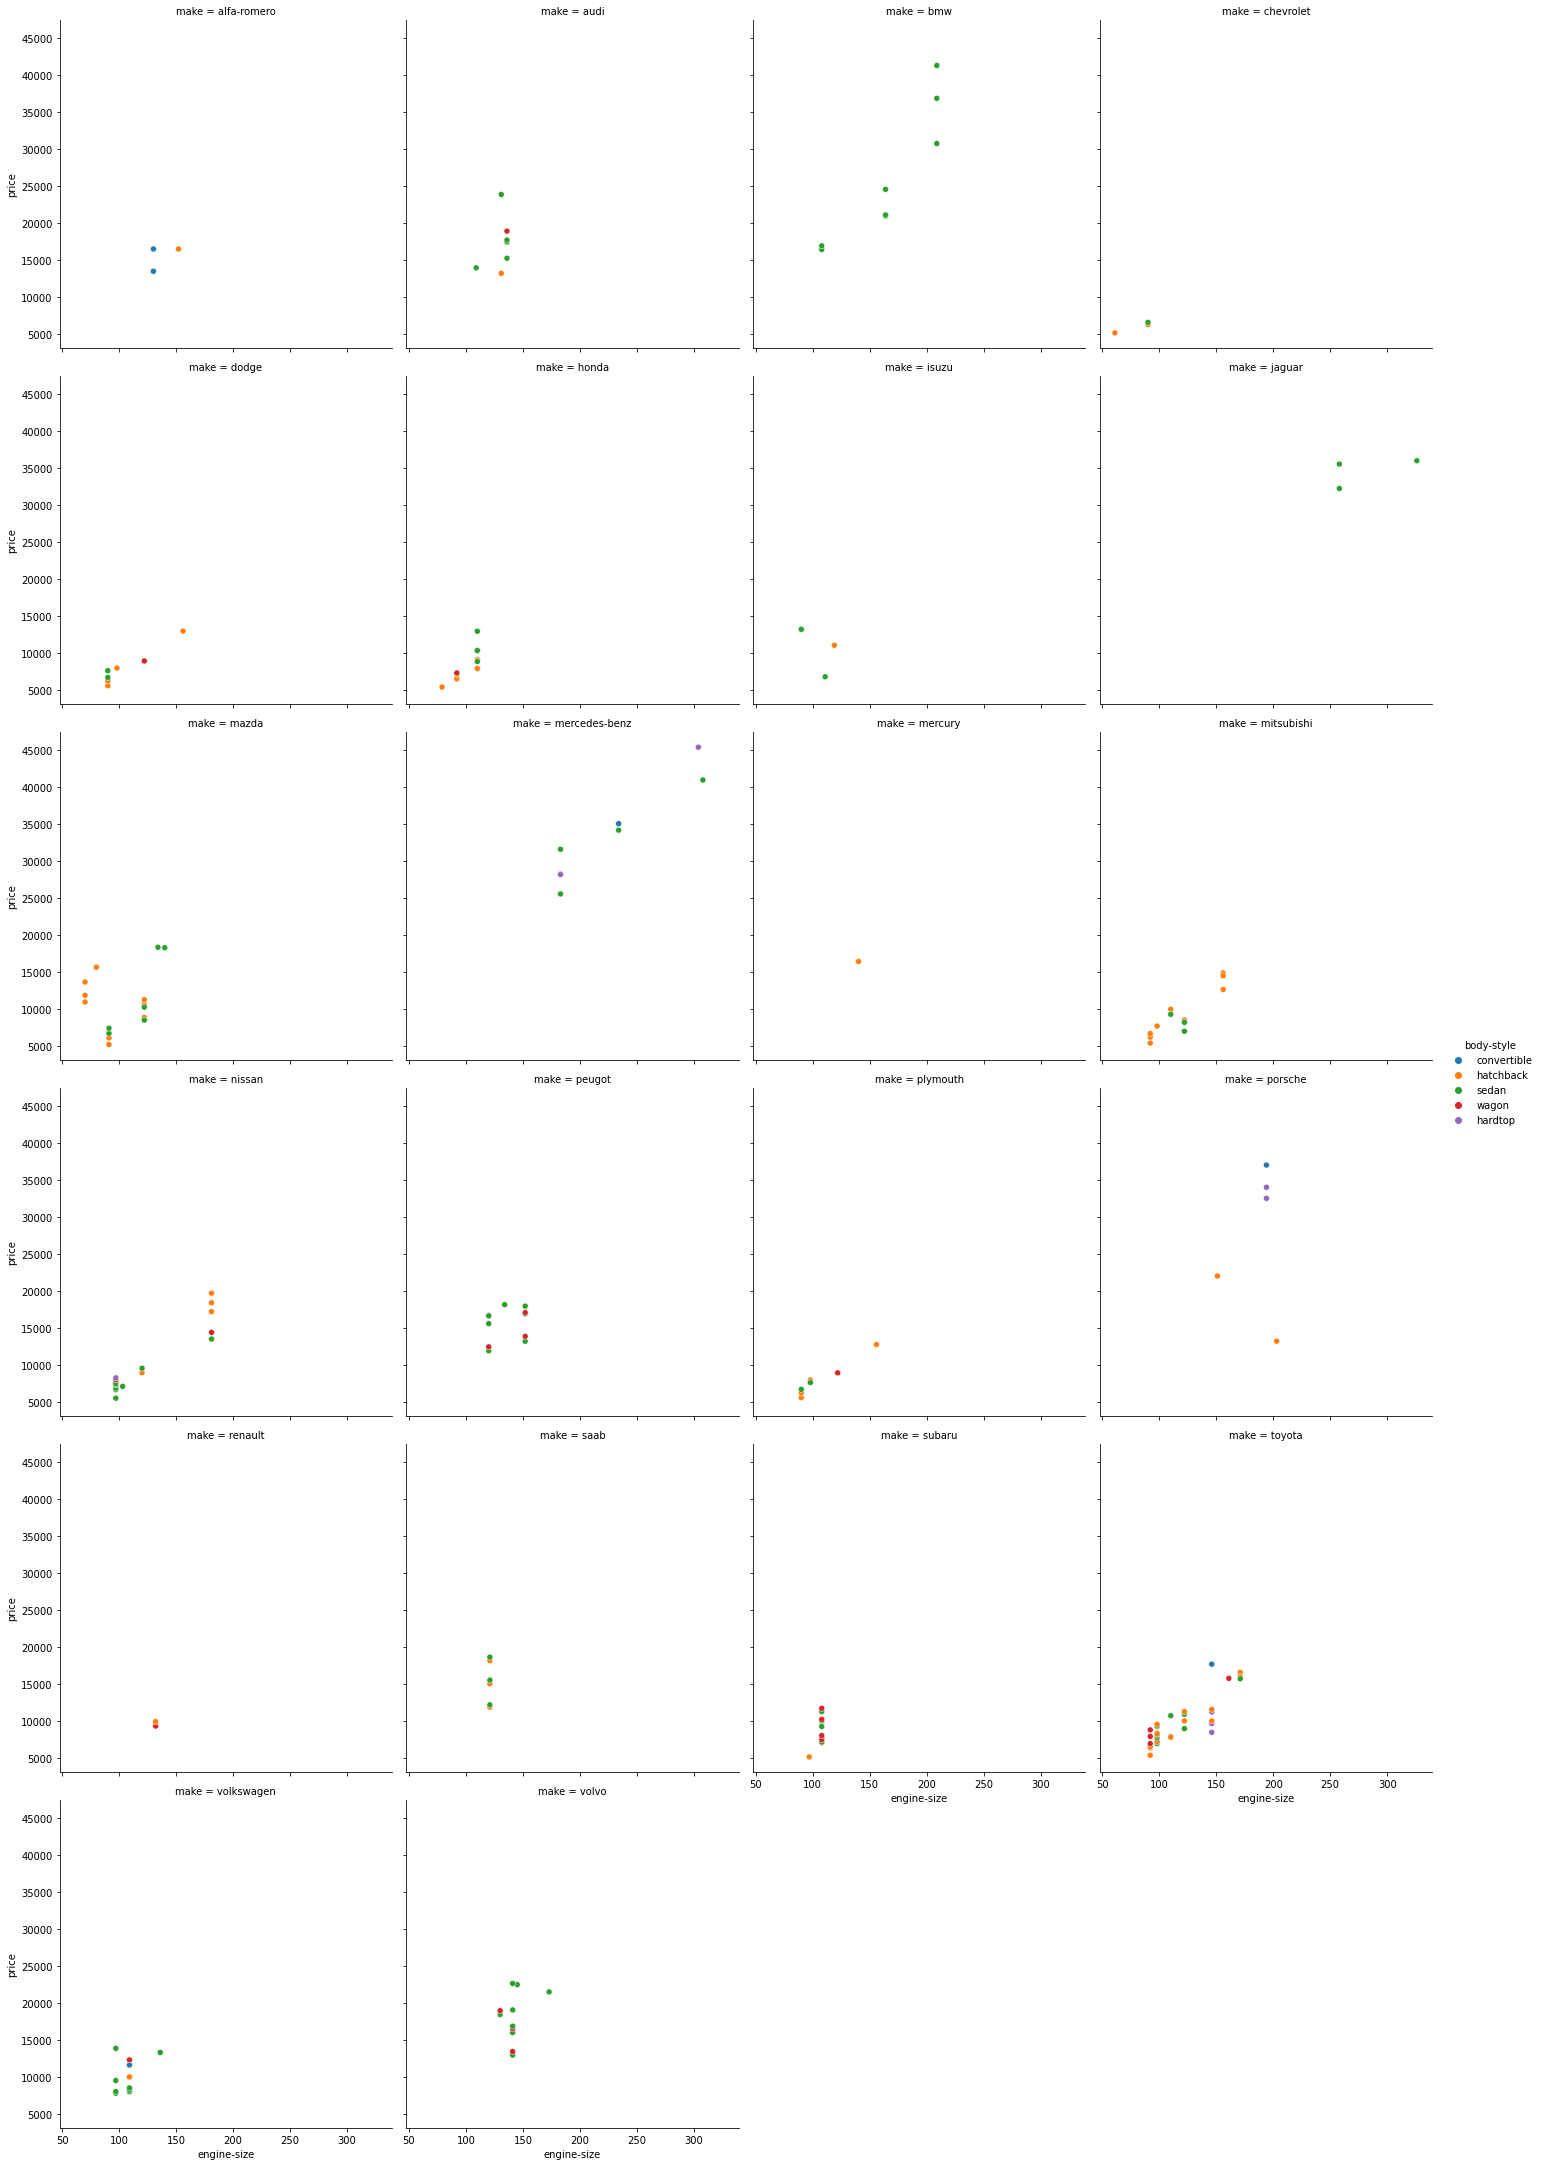

In [431]:
# Scatter/relplot that describes the relationship between price and engine size for different body styles
sns.relplot(data = car_df, y = 'price', x = 'engine-size', col = 'make', hue = 'body-style', col_wrap=4)

These are the the relplots for the price to engine size distributions per car make. It supplements the previous plot by discribing, in a more detailed way, the distribution of price to engine size.

<Figure size 1080x720 with 0 Axes>

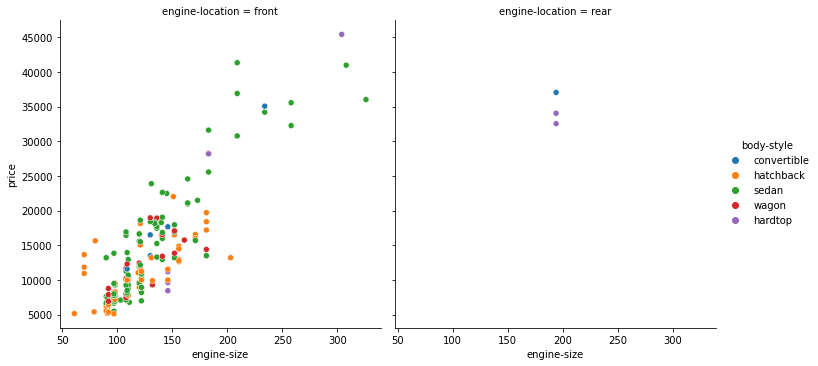

In [432]:
# Scatter/relplot that describes the relationship between price and engine size for different Engine-locations
fig = plt.figure(figsize=(15,10))
sns.relplot(data = car_df, y = 'price', x = 'engine-size', hue = 'body-style', col = 'engine-location')

Prices to engine size but this time the we show the distribution by body type and the different scatter plots are made with the engine location. AS we xan see there are more cars with the engine at the front than at the back.

<Figure size 1080x720 with 0 Axes>

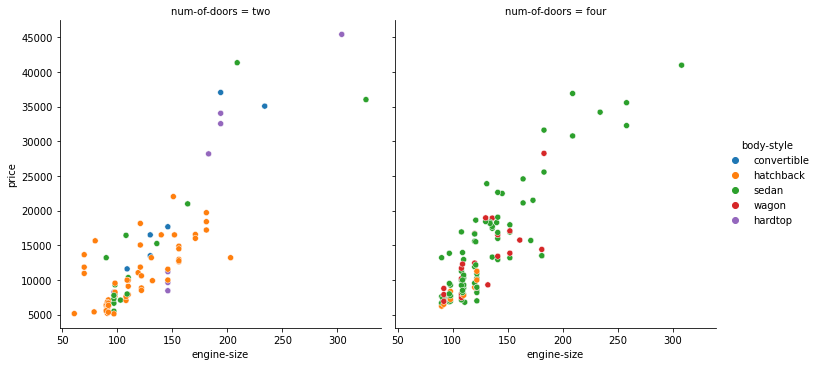

In [433]:
# Scatter/relplot that describes the relationship between price and engine size for different Number-of-doors
fig = plt.figure(figsize=(15,10))
sns.relplot(data = car_df, y = 'price', x = 'engine-size', hue = 'body-style', col = 'num-of-doors')

Same thing once again the engine size to the price but the different plots compare the number of doors and it is wonderful to see how the data is clumped based on the doors.

<Figure size 1080x720 with 0 Axes>

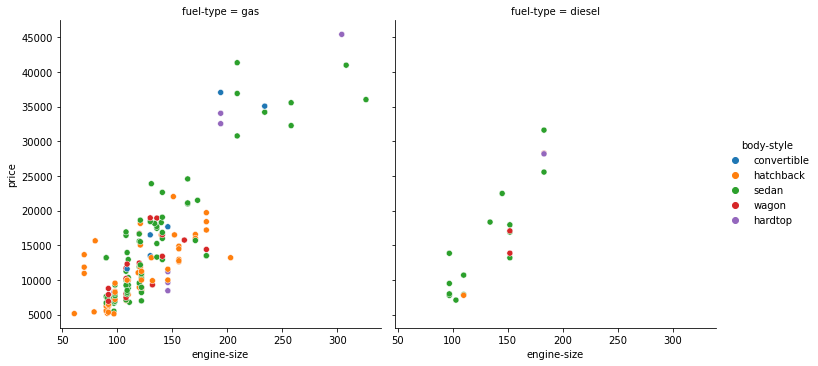

In [434]:
# Scatter/relplot that describes the relationship between price and engine size for different fuel-types
fig = plt.figure(figsize=(15,10))
sns.relplot(data = car_df, y = 'price', x = 'engine-size', hue = 'body-style', col = 'fuel-type')

Same thing once again the engine size to the price but the different plots compare the fuel types and it is wonderful to see how the data is clumped.

<Figure size 1080x720 with 0 Axes>

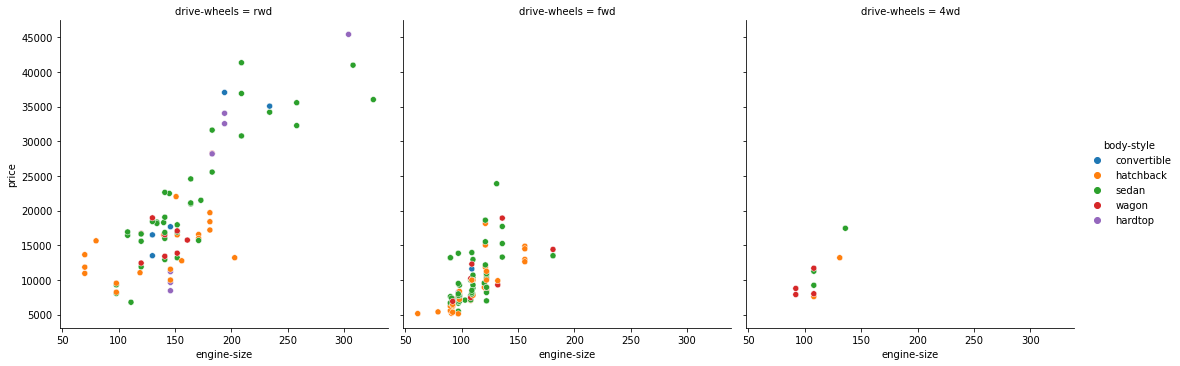

In [435]:
# Scatter/relplot that describes the relationship between price and engine size for different drive-wheels
fig = plt.figure(figsize=(15,10))
sns.relplot(data = car_df, y = 'price', x = 'engine-size', hue = 'body-style', col = 'drive-wheels')

Same thing once again the engine size to the price but the different plots compare the drive wheels and it is wonderful to see how the data is clumped.

<Figure size 1080x720 with 0 Axes>

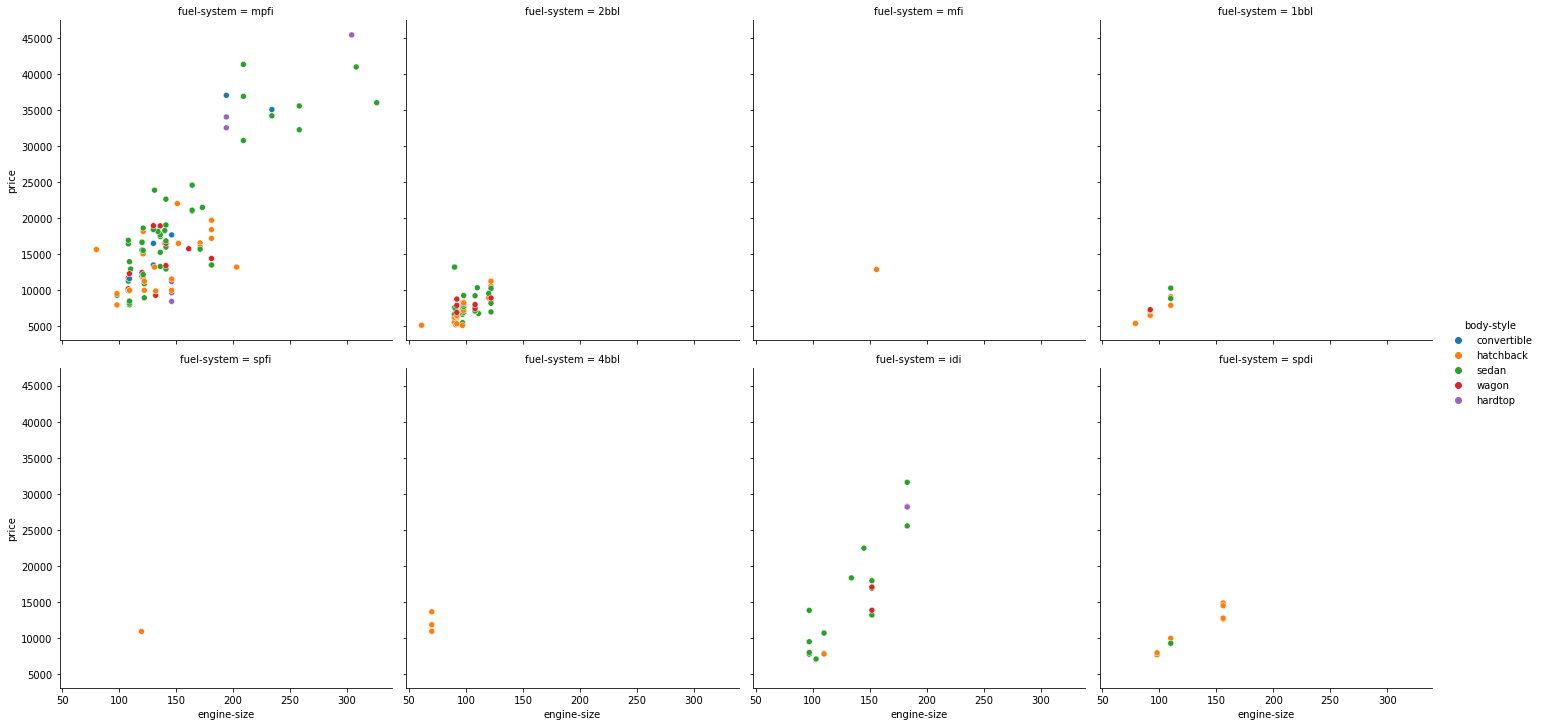

In [436]:
# Scatter/relplot that describes the relationship between price and engine size for different fuel systems
fig = plt.figure(figsize=(15,10))
sns.relplot(data = car_df, y = 'price', x = 'engine-size', hue = 'body-style', col = 'fuel-system' , col_wrap = 4)

Same thing once again the engine size to the price but the different plots compare the fuel-system and it is wonderful to see how the data is clumped. The mpfi seems to be the most common system type within the cars.

In [437]:
# The most expensive car.
most_exp = car_df.loc[car_df['price'] == basic_stats_df['price']['max']]
most_exp

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
74,1,mercedes-benz,gas,std,two,hardtop,rwd,front,112.0,199.2,...,304,mpfi,3.8,3.35,8.0,184.0,4500.0,14,16,45400.0


In [438]:
# The least expensive car.
least_exp = car_df.loc[car_df['price'] == basic_stats_df['price']['min']]
least_exp

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
138,2,subaru,gas,std,two,hatchback,fwd,front,93.7,156.9,...,97,2bbl,3.62,2.36,9.0,69.0,4900.0,31,36,5118.0


In [439]:
top_5price = car_df.sort_values(by = ['price'], ascending = False).head(5)
top_5price

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
74,1,mercedes-benz,gas,std,two,hardtop,rwd,front,112.0,199.2,...,304,mpfi,3.80,3.35,8.0,184.0,4500.0,14,16,45400.0
16,0,bmw,gas,std,two,sedan,rwd,front,103.5,193.8,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,41315.0
73,0,mercedes-benz,gas,std,four,sedan,rwd,front,120.9,208.1,...,308,mpfi,3.80,3.35,8.0,184.0,4500.0,14,16,40960.0
128,3,porsche,gas,std,two,convertible,rwd,rear,89.5,168.9,...,194,mpfi,3.74,2.90,9.5,207.0,5900.0,17,25,37028.0
17,0,bmw,gas,std,four,sedan,rwd,front,110.0,197.0,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,15,20,36880.0


Top 5 most expensive cars.

In [440]:
bot_5price = car_df.sort_values(by = ['price'], ascending = True).head(5)
bot_5price

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
138,2,subaru,gas,std,two,hatchback,fwd,front,93.7,156.9,...,97,2bbl,3.62,2.36,9.0,69.0,4900.0,31,36,5118.0
18,2,chevrolet,gas,std,two,hatchback,fwd,front,88.4,141.1,...,61,2bbl,2.91,3.03,9.5,48.0,5100.0,47,53,5151.0
50,1,mazda,gas,std,two,hatchback,fwd,front,93.1,159.1,...,91,2bbl,3.03,3.15,9.0,68.0,5000.0,30,31,5195.0
150,1,toyota,gas,std,two,hatchback,fwd,front,95.7,158.7,...,92,2bbl,3.05,3.03,9.0,62.0,4800.0,35,39,5348.0
76,2,mitsubishi,gas,std,two,hatchback,fwd,front,93.7,157.3,...,92,2bbl,2.97,3.23,9.4,68.0,5500.0,37,41,5389.0


Top 5 most least cars.

<AxesSubplot:xlabel='engine-size', ylabel='horsepower'>

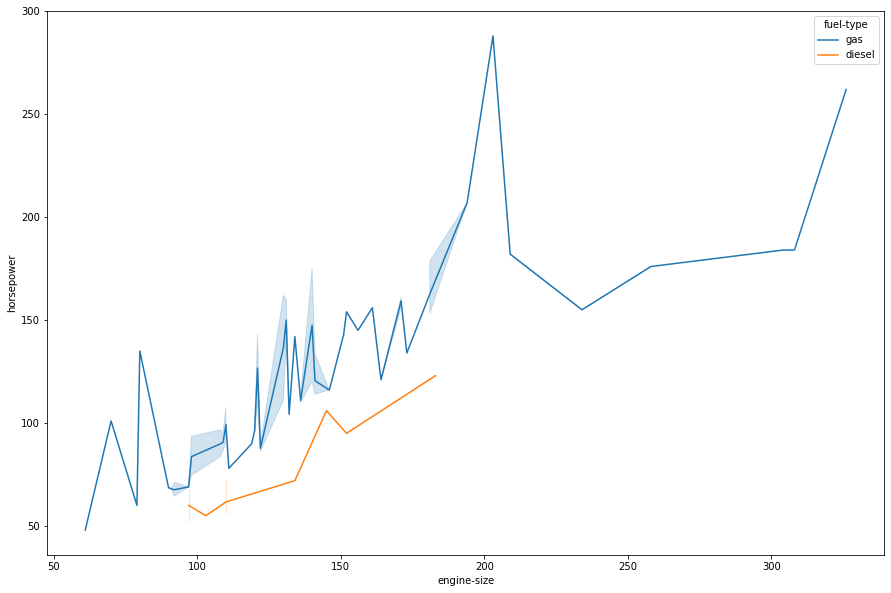

In [441]:
# Lineplot for horsepower and engine size different lines with fuel type
fig = plt.figure(figsize=(15,10))
sns.lineplot(data = car_df, y = 'horsepower', x = 'engine-size', hue = 'fuel-type')

The relationship between the engine size and horsepower is frankly more surprising than i expected. I thought it would be a smoothe upright curve but it seems that on average the greater the engine size the more the horse power. And basically the fuel type does make a huge difference in the horse power as well.

<AxesSubplot:xlabel='engine-size', ylabel='peak-rpm'>

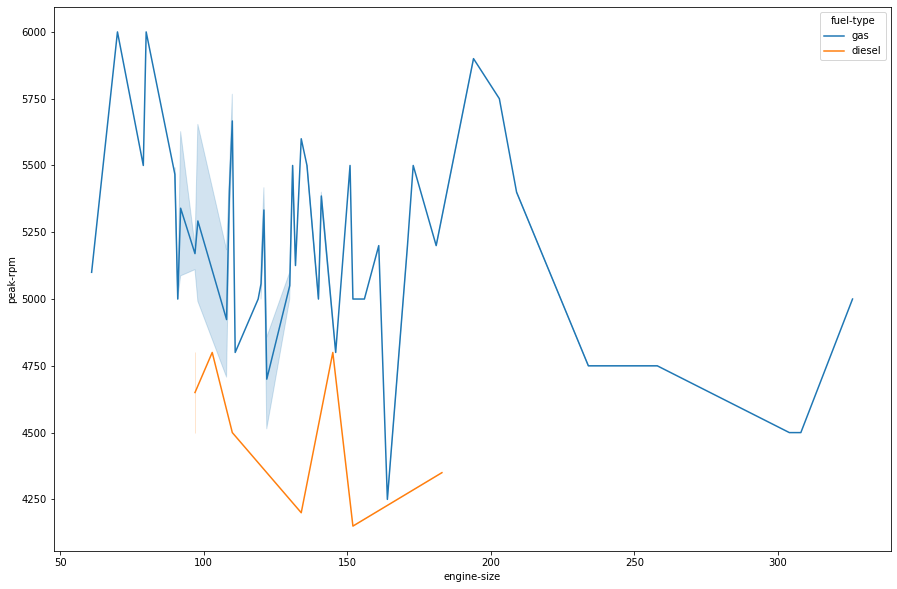

In [442]:
# Lineplot for peak rpm and engine size, different lines with fuel type
fig = plt.figure(figsize=(15,10))
sns.lineplot(data = car_df, y = 'peak-rpm', x = 'engine-size', hue = 'fuel-type')

That's fascinating... the data tends to show that the peak rpm decreases as the size of the engine increases. That's honestly quite fascinatings.

<AxesSubplot:xlabel='engine-size', ylabel='highway-mpg'>

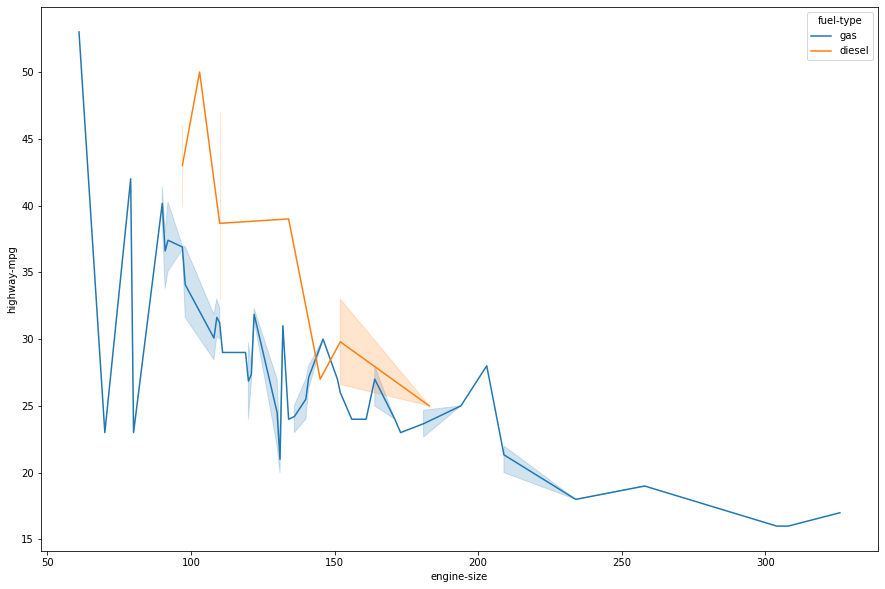

In [443]:
# Lineplot for highway miles per gallon and engine size, different lines with fuel type
fig = plt.figure(figsize=(15,10))
sns.lineplot(data = car_df, y = 'highway-mpg', x = 'engine-size', hue = 'fuel-type')

The value of the highway miles per gallon decreases as the size of the engine increases and based on the fuel type the the value is generally greater when uding diesel than gas. This is truly some interesting information.

<AxesSubplot:xlabel='engine-size', ylabel='city-mpg'>

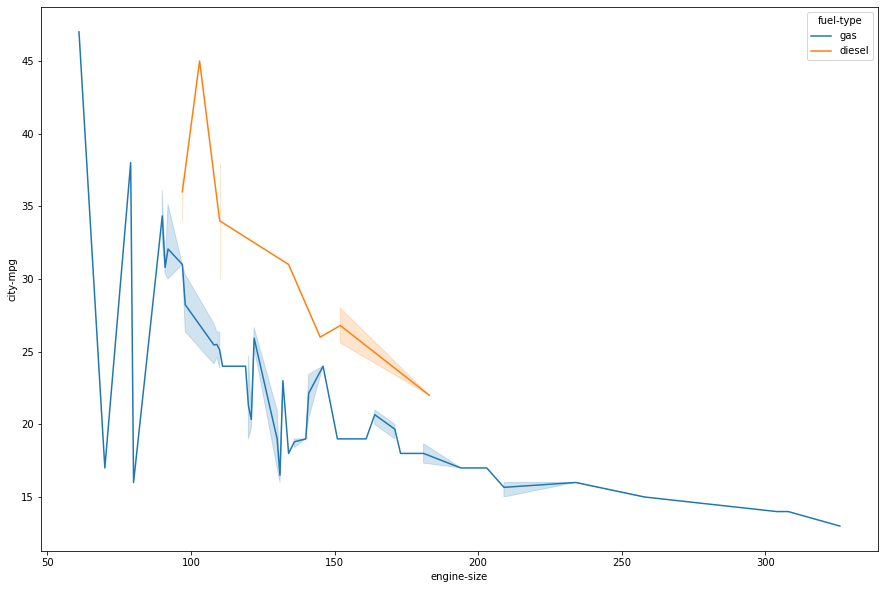

In [444]:
# Lineplot for city miles per gallon and engine size, different lines with fuel type
fig = plt.figure(figsize=(15,10))
sns.lineplot(data = car_df, y = 'city-mpg', x = 'engine-size', hue = 'fuel-type')

The same thing with city miles per gallon this is truly fascinating.

<AxesSubplot:ylabel='make'>

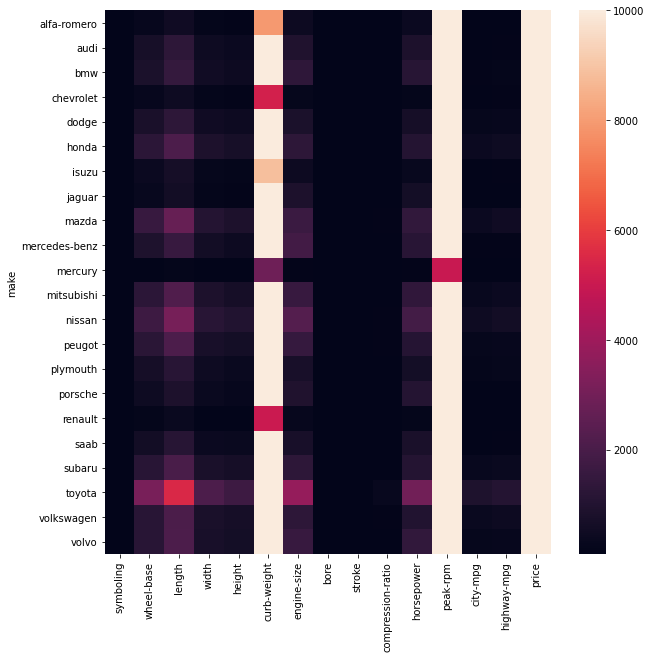

In [445]:
# I was honestly expecting a more interesting heatmap that described the 2D make data.
fig = plt.figure(figsize=(10,10))
sns.heatmap(group_by_make.sum(), vmin = 100, vmax = 10000)

The data is well visualized to describe the summed data of each car based on values like symboling and stroke

<AxesSubplot:xlabel='width', ylabel='length'>

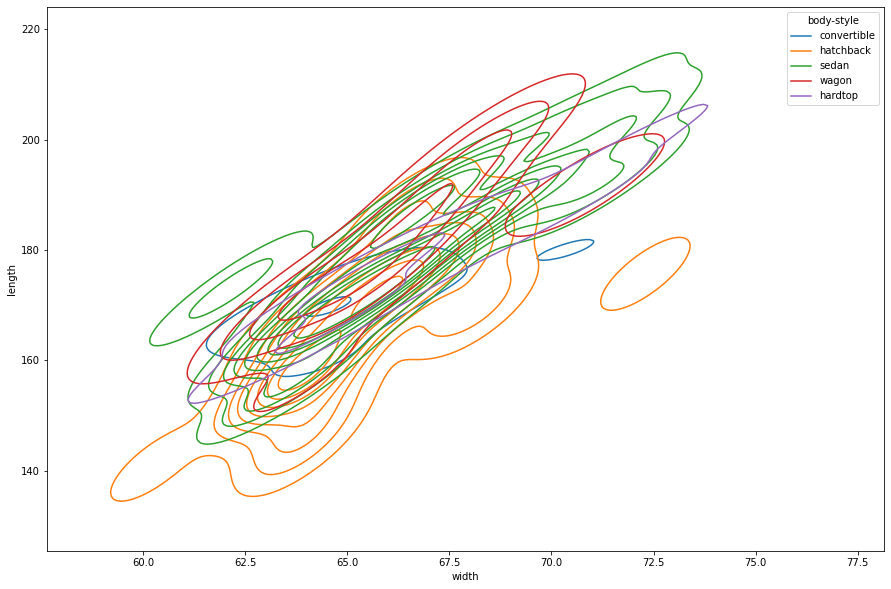

In [446]:
# KDEPLOT for length and width
fig = plt.figure(figsize=(15,10))
sns.kdeplot(data = car_df, y = 'length', x = 'width', hue = 'body-style')

<AxesSubplot:xlabel='height', ylabel='length'>

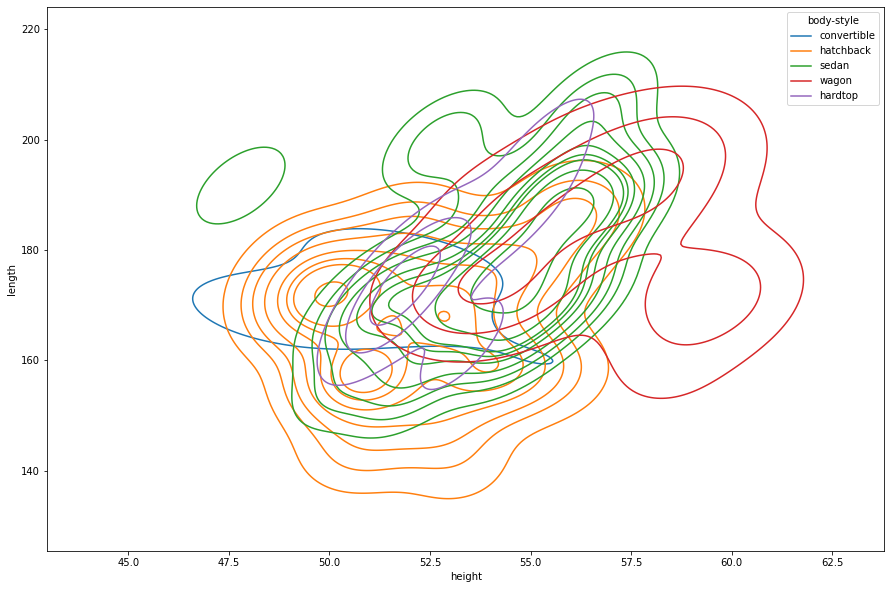

In [447]:
# KDEPLOT for height and lenght
fig = plt.figure(figsize=(15,10))
sns.kdeplot(data = car_df, y = 'length', x = 'height', hue = 'body-style')

<AxesSubplot:xlabel='width', ylabel='height'>

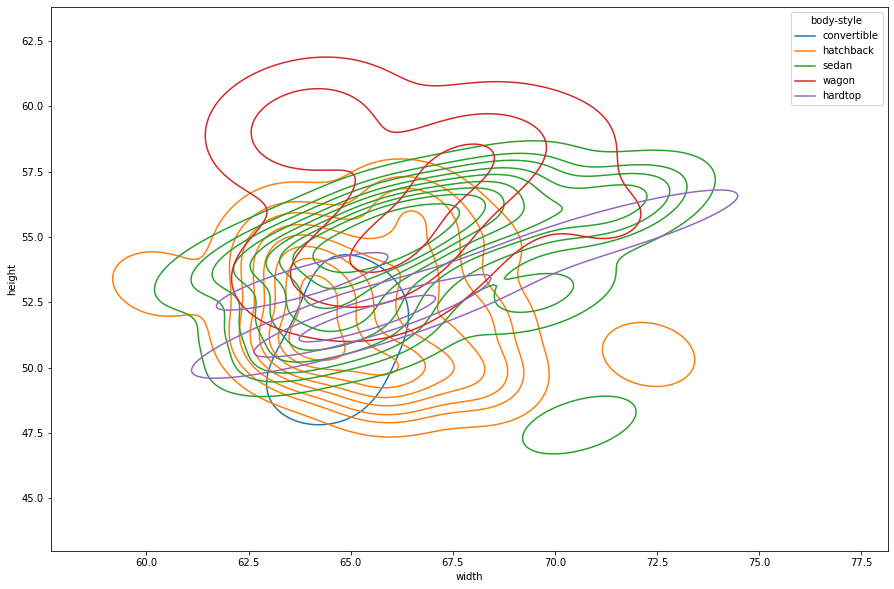

In [448]:
# KDEPLOT for height and width
fig = plt.figure(figsize=(15,10))
sns.kdeplot(data = car_df, y = 'height', x = 'width', hue = 'body-style')

Obviously the height, length and width will affect the the type of car that we will be discuissing so i decided to plot those values into a kde plot and try to describe how the they affect body-style. As we see it shows a that greater sizes will fit into cars like sedans and wagons.

Now the pertinent question is what am I looking to find ?

THIS REPORT WAS WRITTEN BY : Siphesihle Musa Ntombela